In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [4]:
# Завантаження та підготовка даних
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
# Створення архітектури моделі
model = models.Sequential()

# Додавання шарів
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Компіляція моделі
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Навчання моделі
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Оцінка точності на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Виведення графіків навчання
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)




Epoch 1/10


750/750 [==============================] - 9s 10ms/step - loss: 0.5536 - accuracy: 0.7969 - val_loss: 0.3834 - val_accuracy: 0.8636
Epoch 2/10
750/750 [==============================] - 7s 10ms/step - loss: 0.3452 - accuracy: 0.8745 - val_loss: 0.3323 - val_accuracy: 0.8801
Epoch 3/10
750/750 [==============================] - 8s 10ms/step - loss: 0.2952 - accuracy: 0.8926 - val_loss: 0.3028 - val_accuracy: 0.8901
Epoch 4/10
750/750 [==============================] - 8s 10ms/step - loss: 0.2645 - accuracy: 0.9026 - val_loss: 0.2883 - val_accuracy: 0.8970
Epoch 5/10
750/750 [==============================] - 9s 12ms/step - loss: 0.2414 - accuracy: 0.9111 - val_loss: 0.2643 - val_accuracy: 0.9057
Epoch 6/10
750/750 [==============================] - 10s 13ms/step - loss: 0.2194 - accuracy: 0.9187 - val_loss: 0.2792 - val_accuracy: 0.8988
Epoch 7/10
750/750 [==============================] - 8s 10ms/step - loss: 0.1998 - accuracy: 0.9266 - val_loss: 0.2653 - val_accuracy: 

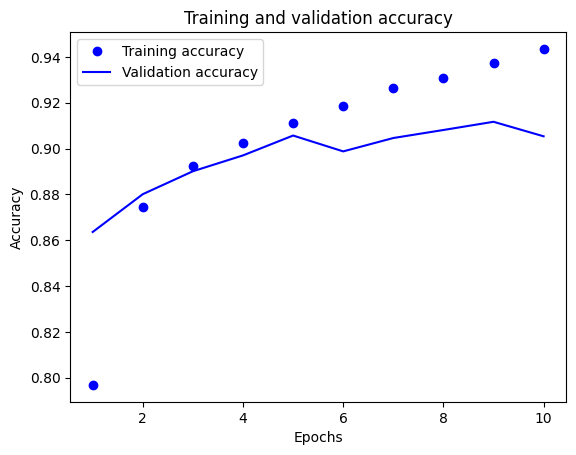

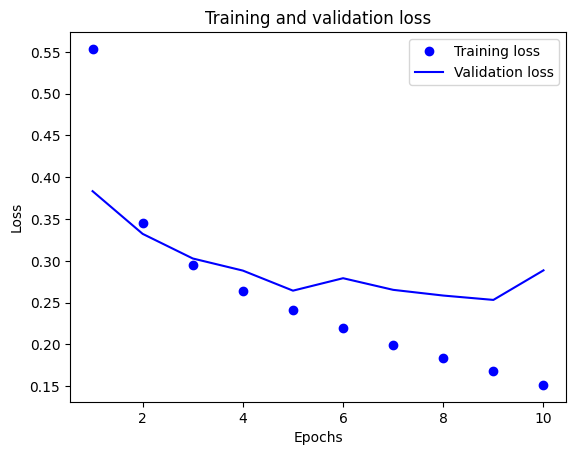

In [6]:
# Графік точності
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

# Графік втрат
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [7]:
# Отримання прогнозів для тестових даних
predictions = model.predict(test_images)
predicted_labels = tf.argmax(predictions, axis=1).numpy()
true_labels = tf.argmax(test_labels, axis=1).numpy()

# Виведення метрик якості для кожного класу
print(classification_report(true_labels, predicted_labels))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1000
           1       1.00      0.97      0.99      1000
           2       0.79      0.91      0.85      1000
           3       0.89      0.94      0.91      1000
           4       0.84      0.85      0.84      1000
           5       0.99      0.96      0.98      1000
           6       0.84      0.56      0.68      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

